In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pumpkins = pd.read_csv("US-pumpkins.csv")
pumpkins.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [3]:
from sklearn.preprocessing import LabelEncoder

In [4]:
pumpkins = pumpkins[pumpkins["Package"].str.contains('bushel')]

new_columns = ['Package', 'Variety', 'City Name', 'Month', 'Low Price', 'High Price', 'Date']

pumpkins = pumpkins.drop([c for c in pumpkins.columns if c not in new_columns], axis=1)

price = (pumpkins["Low Price"] + pumpkins["High Price"]) / 2

month = pd.DatetimeIndex(pumpkins["Date"]).month

new_pumpkins = pd.DataFrame({'Month': month, 'Variety': pumpkins['Variety'], 'City': pumpkins['City Name'], 
  'Package': pumpkins['Package'], 'Low Price': pumpkins['Low Price'], 'High Price': pumpkins['High Price'], 'Price': price})
new_pumpkins

,Month,Variety,City,Package,Low Price,High Price,Price
70,9,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,15.00,15.0,15.000
71,9,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,18.00,18.0,18.000
72,10,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,18.00,18.0,18.000
73,10,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,17.00,17.0,17.000
74,10,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,15.00,15.0,15.000
...,...,...,...,...,...,...,...
1738,9,MINIATURE,ST. LOUIS,1/2 bushel cartons,15.00,15.0,15.000
1739,9,MINIATURE,ST. LOUIS,1/2 bushel cartons,13.75,15.0,14.375
1740,9,MINIATURE,ST. LOUIS,1/2 bushel cartons,10.75,15.0,12.875
1741,9,MINIATURE,ST. LOUIS,1/2 bushel cartons,12.00,12.0,12.000


In [5]:
new_pumpkins['Package'].str.contains('1 1/9')

70       True
71       True
72       True
73       True
74       True
        ...  
1738    False
1739    False
1740    False
1741    False
1742    False
Name: Package, Length: 415, dtype: bool

In [6]:
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price']

70      15.0
71      18.0
72      18.0
73      17.0
74      15.0
        ... 
1626    12.0
1627    12.0
1628    19.0
1629    18.0
1630    20.0
Name: Price, Length: 134, dtype: float64

In [7]:
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price / 1.1

In [8]:
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = price * 2
new_pumpkins

,Month,Variety,City,Package,Low Price,High Price,Price
70,9,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,15.00,15.0,13.636364
71,9,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,18.00,18.0,16.363636
72,10,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,18.00,18.0,16.363636
73,10,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,17.00,17.0,15.454545
74,10,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,15.00,15.0,13.636364
...,...,...,...,...,...,...,...
1738,9,MINIATURE,ST. LOUIS,1/2 bushel cartons,15.00,15.0,30.000000
1739,9,MINIATURE,ST. LOUIS,1/2 bushel cartons,13.75,15.0,28.750000
1740,9,MINIATURE,ST. LOUIS,1/2 bushel cartons,10.75,15.0,25.750000
1741,9,MINIATURE,ST. LOUIS,1/2 bushel cartons,12.00,12.0,24.000000


In [9]:
new_pumpkins.iloc[:, 0:-1] = new_pumpkins.iloc[:, 0:-1].apply(LabelEncoder().fit_transform)
new_pumpkins

,Month,Variety,City,Package,Low Price,High Price,Price
70,1,3,1,0,5,3,13.636364
71,1,3,1,0,10,7,16.363636
72,2,3,1,0,10,7,16.363636
73,2,3,1,0,9,6,15.454545
74,2,3,1,0,5,3,13.636364
...,...,...,...,...,...,...,...
1738,1,1,9,2,5,3,30.000000
1739,1,1,9,2,3,3,28.750000
1740,1,1,9,2,0,3,25.750000
1741,1,1,9,2,1,0,24.000000


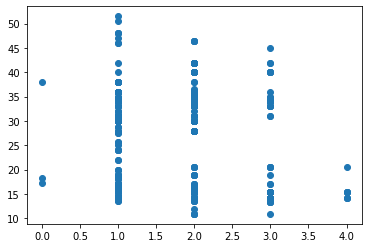

In [10]:
plt.scatter(new_pumpkins['Month'], new_pumpkins['Price'])

In [11]:
new_pumpkins.dropna(inplace=True)
new_pumpkins

,Month,Variety,City,Package,Low Price,High Price,Price
70,1,3,1,0,5,3,13.636364
71,1,3,1,0,10,7,16.363636
72,2,3,1,0,10,7,16.363636
73,2,3,1,0,9,6,15.454545
74,2,3,1,0,5,3,13.636364
...,...,...,...,...,...,...,...
1738,1,1,9,2,5,3,30.000000
1739,1,1,9,2,3,3,28.750000
1740,1,1,9,2,0,3,25.750000
1741,1,1,9,2,1,0,24.000000


In [12]:
new_pumpkins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 415 entries, 70 to 1742
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Month       415 non-null    int64  
 1   Variety     415 non-null    int32  
 2   City        415 non-null    int32  
 3   Package     415 non-null    int32  
 4   Low Price   415 non-null    int64  
 5   High Price  415 non-null    int64  
 6   Price       415 non-null    float64
dtypes: float64(1), int32(3), int64(3)
memory usage: 21.1 KB


In [14]:
#correlation 
new_pumpkins["City"].corr(new_pumpkins["Price"])

0.32363971816089226

In [15]:
new_pumpkins["Package"].corr(new_pumpkins["Price"])

0.6061712937226021

### Linear Regression

In [16]:
new_columns = ["Package", "Price"]

lin_pumpkins = new_pumpkins.drop([c for c in new_pumpkins if c not in new_columns], axis=1)
lin_pumpkins

,Package,Price
70,0,13.636364
71,0,16.363636
72,0,16.363636
73,0,15.454545
74,0,13.636364
...,...,...
1738,2,30.000000
1739,2,28.750000
1740,2,25.750000
1741,2,24.000000


In [22]:
X = lin_pumpkins.values[:, :1]
len(X)

415

In [21]:
y = lin_pumpkins.values[:, 1:2]
len(y)

415

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

0.2

In [48]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

pred = lin_reg.predict(X_test)

# Model accuracy
accuracy_score = lin_reg.score(X_train, y_train)
accuracy_score

0.3315342327998987

Text(0, 0.5, 'Price')

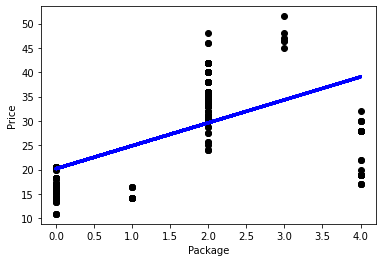

In [58]:
plt.scatter(X_train, y_train, color="Black")
plt.plot(X_test, pred, color="Blue", linewidth=3)
plt.xlabel("Package")
plt.ylabel("Price")

### Polynomial regression

In [60]:
poly_pumpkins = new_pumpkins

In [61]:
poly_pumpkins

,Month,Variety,City,Package,Low Price,High Price,Price
70,1,3,1,0,5,3,13.636364
71,1,3,1,0,10,7,16.363636
72,2,3,1,0,10,7,16.363636
73,2,3,1,0,9,6,15.454545
74,2,3,1,0,5,3,13.636364
...,...,...,...,...,...,...,...
1738,1,1,9,2,5,3,30.000000
1739,1,1,9,2,3,3,28.750000
1740,1,1,9,2,0,3,25.750000
1741,1,1,9,2,1,0,24.000000


In [62]:
corr = poly_pumpkins.corr()
corr.style.background_gradient(cmap ='coolwarm')

,Month,Variety,City,Package,Low Price,High Price,Price
Month,1.000000,0.171330,-0.188728,-0.144847,-0.002930,-0.028949,-0.148783
Variety,0.171330,1.000000,-0.248441,-0.614855,-0.073349,-0.107464,-0.863479
City,-0.188728,-0.248441,1.000000,0.301604,0.172619,0.218157,0.323640
Package,-0.144847,-0.614855,0.301604,1.000000,0.320235,0.384265,0.606171
Low Price,-0.002930,-0.073349,0.172619,0.320235,1.000000,0.918809,0.322444
High Price,-0.028949,-0.107464,0.218157,0.384265,0.918809,1.000000,0.371248
Price,-0.148783,-0.863479,0.323640,0.606171,0.322444,0.371248,1.000000


In [63]:
poly_pumpkins

,Month,Variety,City,Package,Low Price,High Price,Price
70,1,3,1,0,5,3,13.636364
71,1,3,1,0,10,7,16.363636
72,2,3,1,0,10,7,16.363636
73,2,3,1,0,9,6,15.454545
74,2,3,1,0,5,3,13.636364
...,...,...,...,...,...,...,...
1738,1,1,9,2,5,3,30.000000
1739,1,1,9,2,3,3,28.750000
1740,1,1,9,2,0,3,25.750000
1741,1,1,9,2,1,0,24.000000


### How to covert DataFrame to Numpy Array
* df.values

In [70]:
X = poly_pumpkins.iloc[:, 3:4].values
y = poly_pumpkins.iloc[:, -1].values